<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/Linear_LogisticRegression_EvalMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

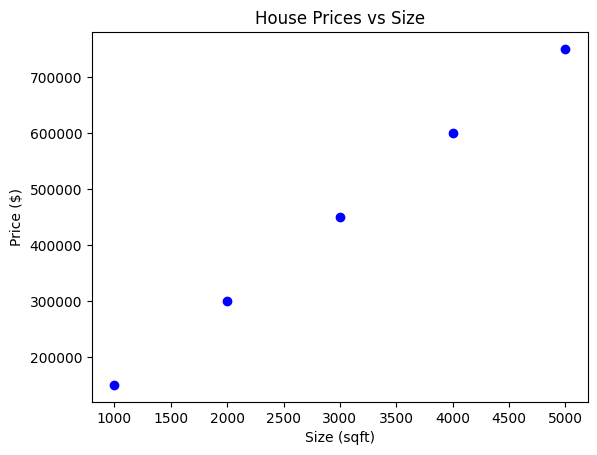

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. The Inputs (Feature): House Size in sqft
# Note the double brackets [[ ]] -> This makes it a 2D array
X = np.array([[1000], [2000], [3000], [4000], [5000]])

# 2. The Answers (Target): Price in $
y = np.array([150000, 300000, 450000, 600000, 750000])

# 3. Let's see what we are teaching the computer
plt.scatter(X, y, color='blue')  #scatter plot gives true value while line use for predictions
plt.title("House Prices vs Size")
plt.xlabel("Size (sqft)")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #create model
model.fit(X, y) #train the model , fit(inputdata, correct_ans)
print("Training Complete. The AI has learned the pattern.")

Training Complete. The AI has learned the pattern.


In [ ]:
new_house = [[2500]]
predicted_price = model.predict(new_house)
print(f"predicted price of house is ${predicted_price[0]}")

predicted price of house is $375000.0


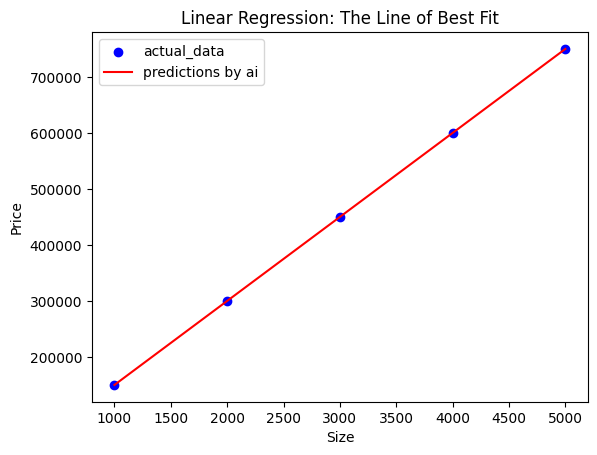

In [ ]:
predictions = model.predict(X)
plt.scatter(X, y, color = "blue", label = "actual_data")
plt.plot(X, predictions, color = "red", label = "predictions by ai")
plt.title("Linear Regression: The Line of Best Fit")
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Messier data
data = {
    'Size': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Price': [150000, 280000, 460000, 590000, 740000, 810000, 950000, 1020000, 1150000, 1250000]
}
df = pd.DataFrame(data)

X = df[['Size']] # Double brackets for 2D array
y = df['Price']  # Single bracket for 1D array


# test_size=0.2 means "Save 20% for the exam"
# random_state=42 just ensures we get the same random split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {len(X_train)} houses")
print(f"Testing Data: {len(X_test)} houses")

Training Data: 8 houses
Testing Data: 2 houses


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) #training complete
predictions = model.predict(X_test) #predict
print(predictions) #print the predicted values
print(y_test.values) #print the actual values

[1164137.93103448  328362.06896552]
[1150000  280000]


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)

print(f"On average, the model is wrong by: ${mae:,.2f}")

On average, the model is wrong by: $31,250.00


In [ ]:
#LOGISTIC REGRESSION

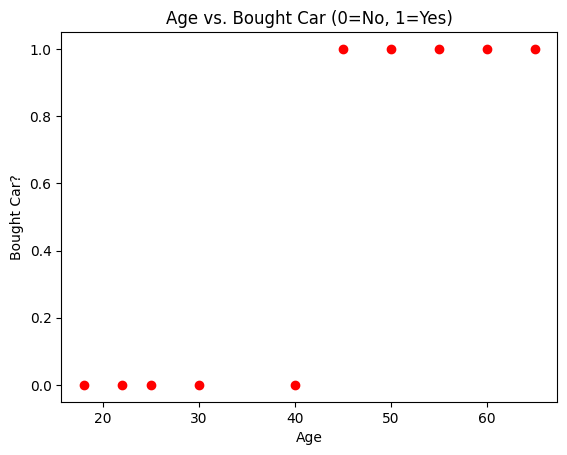

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Input: Age (2D Array)
X = np.array([[18], [22], [25], [30], [40], [45], [50], [55], [60], [65]])

# Output: Bought Car? (0 = No, 1 = Yes)
y = np.array([ 0,    0,    0,    0,    0,    1,    1,    1,    1,    1])

# Let's see the data
plt.scatter(X, y, color='red')
plt.title("Age vs. Bought Car (0=No, 1=Yes)")
plt.xlabel("Age")
plt.ylabel("Bought Car?")
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X, y) #model trained
age = [[35]]
prediction = model.predict(age)
prob = model.predict_proba(age)

print(f"Prediction for 35 year old: {prediction[0]}")
print(f"Probability [No, Yes]: {prob}")

Prediction for 35 year old: 0
Probability [No, Yes]: [[0.99568643 0.00431357]]


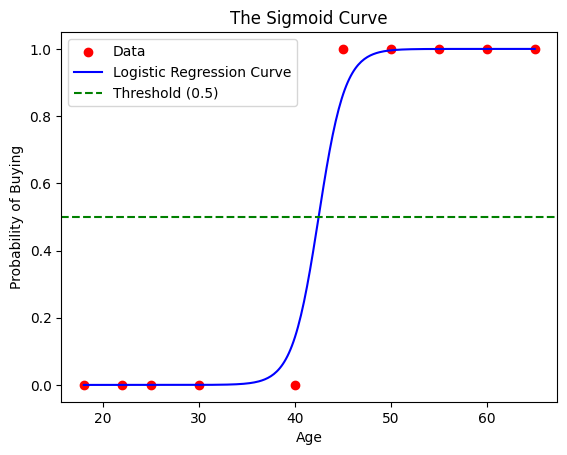

In [ ]:
# Generate a range of ages from 18 to 65 to make a smooth line
age_range = np.linspace(18, 65, 300).reshape(-1, 1)

# Get probabilities for all these ages
probabilities = model.predict_proba(age_range)[:, 1] # [:, 1] gets the probability of "Yes"

# Plot the Data (Dots)
plt.scatter(X, y, color='red', label='Data')

# Plot the S-Curve (Blue Line)
plt.plot(age_range, probabilities, color='blue', label='Logistic Regression Curve')

# Draw the 0.5 Threshold line
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5)')

plt.title("The Sigmoid Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Buying")
plt.legend()
plt.show()

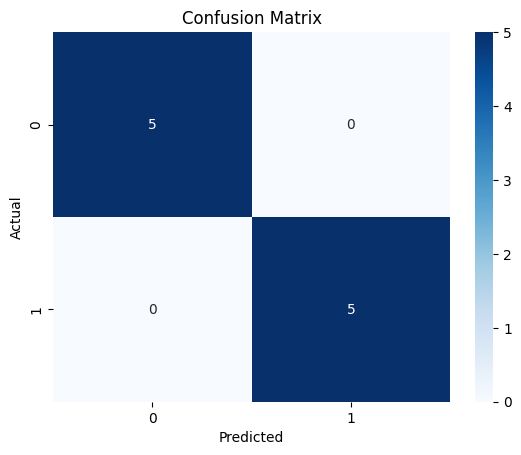

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Get the model's predictions for our data
predictions = model.predict(X)

# 2. Generate the Confusion Matrix
# It compares "Real Answers (y)" vs "Predictions"
cm = confusion_matrix(y, predictions)

# 3. Visualize it nicely
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. The Data (Same as before)
X = np.array([[18], [22], [25], [30], [40], [45], [50], [55], [60], [65]])
y = np.array([ 0,    0,    0,    0,    0,    1,    1,    1,    1,    1])

# 2. The Split (80% Train, 20% Test)
# stratify=y ensures we get a mix of 0s and 1s in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify gurantees u get every variety of answer
#if u have 5 apple,1 banana and you have to choose two fruits blindfolded u may get 2 apples so u never tasted banana

# 3. Train on the 8 people
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Test on the 2 hidden people
predictions = model.predict(X_test)

# 5. The Results
print(f"Test Set (Ages): \n{X_test}")
print(f"Actual Answers: {y_test}")
print(f"Model Predictions: {predictions}")

# Check Accuracy
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score * 100}%")

Test Set (Ages): 
[[30]
 [65]]
Actual Answers: [0 1]
Model Predictions: [0 1]
Accuracy: 100.0%


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Note: In this dataset: 0 = Malignant (Cancer), 1 = Benign (Safe)
# This is a bit counter-intuitive, usually 1 is the "bad" thing.
# Let's keep it in mind: Class 0 is the one we really care about catching.

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train
# max_iter=3000 just gives the math more time to converge/solve
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# 4. Predict
predictions = model.predict(X_test)

# 5. The Grade Card
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=data.target_names))

Confusion Matrix:
[[39  3]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
